# Project

#### Stefano Riato
#### Matricola ID: 894041
#### Ca' Foscari University of Venice
#### Project for Lab of Information Systems and Analytics
#### May 2024

# Summary of the Project Roadmap

1. **Load Dataset**
2. **Data Cleaning** 
3. **Exploratory Data Analysis (EDA)** 
4. **Data Pre-processing**
5. **Feature Engineering**
6. **Model Training, Hyper-Tuning parameters and Evaluation**
7. **Conclusions**



In [1]:
# Importing libraries and setting options
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt     # To plot graphs
import seaborn as sns               # To plot graphs
sns.set_style('whitegrid')          # To set the style of the graphs
%matplotlib inline 

pd.options.display.max_columns = 90 # To display all the columns of the dataframe   

In [2]:
data_full = pd.read_csv('../datasets/bank/bank-full.csv', sep=';')


In [3]:
# the shape of the dataset 
print('The dataset has {} rows and {} columns.'.format(data_full.shape[0], data_full.shape[1]))
print('\n')
# look at the first lines of the dataset
data_full.head()



The dataset has 45211 rows and 17 columns.




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# look at the last lines of the dataset
data_full.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Get information about the dataset (data types, number of non-null values, etc.)
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The dataset does not contain any NaN values. But we need to confirm that. So we use the code below:

In [6]:
# Check if there is some NaN values
if (data_full.isnull().values.any()) == True:
    print('There are NaN values in the dataset.')
else:
    print('There are no NaN values in the dataset.')

There are no NaN values in the dataset.


Some columns need to be converted because they are not of the correct type.

In [7]:

categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in categorical_columns:
    data_full[col] = pd.Categorical(data_full[col])


binary_columns = ['default', 'housing', 'loan', 'y']
for col in binary_columns:
    data_full[col] = data_full[col].map({'yes': 1, 'no': 0})


numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
for col in numeric_columns:
    data_full[col] = pd.to_numeric(data_full[col], errors='coerce')


# Controlla il nuovo tipo di dati per ogni colonna

data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  int64   
dtypes: category(6), int64(11)
memory usage: 4.1 MB


Now we have the dataset that is ready to be analyzed. We investigate the dataset with some statistics:

In [8]:
data_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


We can notice that pdays has a lot of -1 values. We need to investigate this column.
So we use the code below to check the number of -1 values in the pdays column:

In [9]:
# data cleaning -> check if there are too many -1 in the pdays column in order to drop them or the column
data_full['pdays']
count = 0
count1 = 0
for i in data_full['pdays']:
    if i == -1:
        count += 1
    else:
        count1 += 1

print(f'-1 : {count}')
print(f'not -1 : {count1}')


-1 : 36954
not -1 : 8257


We can see that the column pdays has a lot of -1 values. This column is not useful for the prediction of the target variable y since it is not heterogeneous. So we can decide to drop at the end of the analysis.

In [10]:
# Investigate the distribution of nominal features

# Count how many nominal, ordinal, continuous and discrete features there are in the dataset
nominal = 0
ordinal = 0
continuous = 0
discrete = 0
for col in data_full.columns:
    if data_full[col].dtype == 'object':
        nominal += 1
    elif data_full[col].dtype == 'int64':
        discrete += 1
    elif data_full[col].dtype == 'float64':
        continuous += 1
    else:
        ordinal += 1

print('There are {} nominal features, {} ordinal features, {} continuous features and {} discrete features.'.format(nominal, ordinal, continuous, discrete))

There are 0 nominal features, 6 ordinal features, 0 continuous features and 11 discrete features.


In [13]:
# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# First of all, I need to select the norminal features
nominal_features = list(col for col in data_full.columns if data_full[col].dtype == 'object')

# Then, I can plot the distribution of each norminal feature in a subplot figure
n_cols = 4 
n_rows = int(np.ceil(len(nominal_features) / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*6)) 
# flatten the axes array to 1-d
axes = axes.ravel() 
for i, col in enumerate(nominal_features):
    sns.countplot(x=col, data=data_full, ax=axes[i]) 
    axes[i].set_title(f'Distribution of {col}') 
    # smaller font for x-tick labels
    plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=8) 
    # remove the x-axis label and set the label padding
    axes[i].set_xlabel('', labelpad=10)
    axes[i].set_ylabel('Count')

# if there are more subplots than features to plot, hide the empty subplots
if n_cols*n_rows > len(nominal_features): 
    for i in range(len(nominal_features), n_cols*n_rows):
        axes[i].axis('off')

# adjust the subplot layout to fill the figure area
plt.tight_layout() 
plt.show()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1600x0 with 0 Axes>

# Feature Engignering and Data Cleaning

We work with bank-full.cvs since it is the dataset that we want to take into account for this project.

c:\Users\User\.pyenv\pyenv-win\versions\3.9.1\lib\site-packages\pandas\plotting\_matplotlib\misc.py:96: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


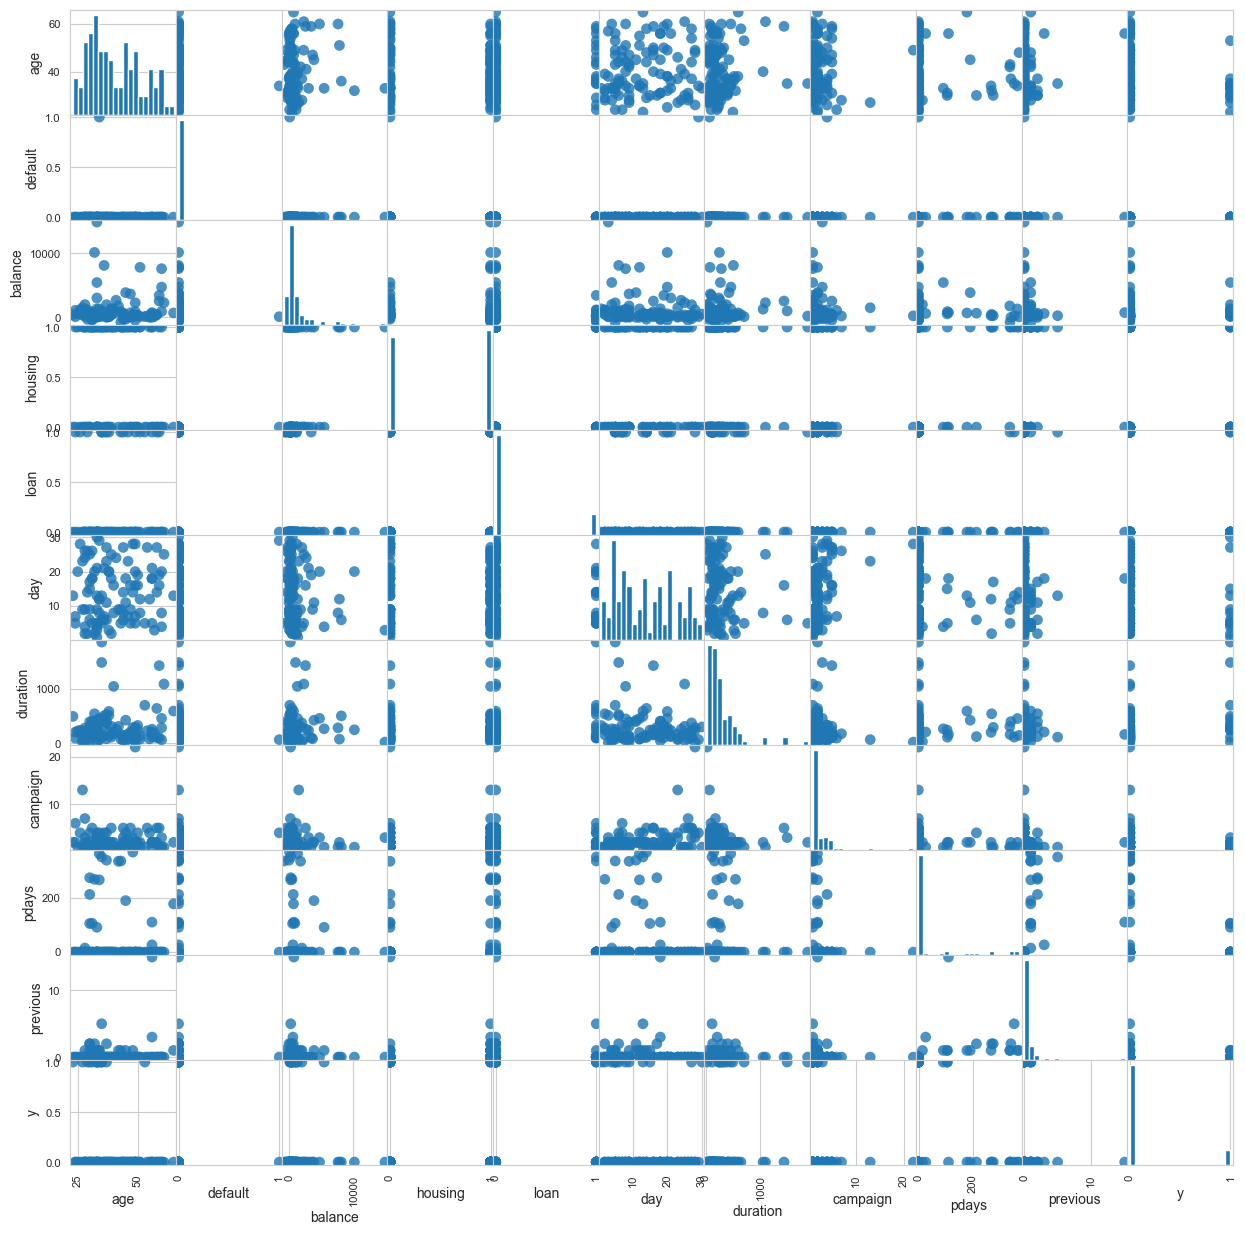

In [11]:
#create a scatter matrix from the dataframe
sample_data = data_full.sample(n=100, random_state=42)

grr = pd.plotting.scatter_matrix(sample_data, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8, cmap='viridis')

In [12]:
# Distribuzione delle variabili numeriche con istogrammi
num_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[num_columns].hist(bins=15, figsize=(20, 10), layout=(4, 8), edgecolor='black')
plt.tight_layout()
plt.show()



NameError: name 'data' is not defined

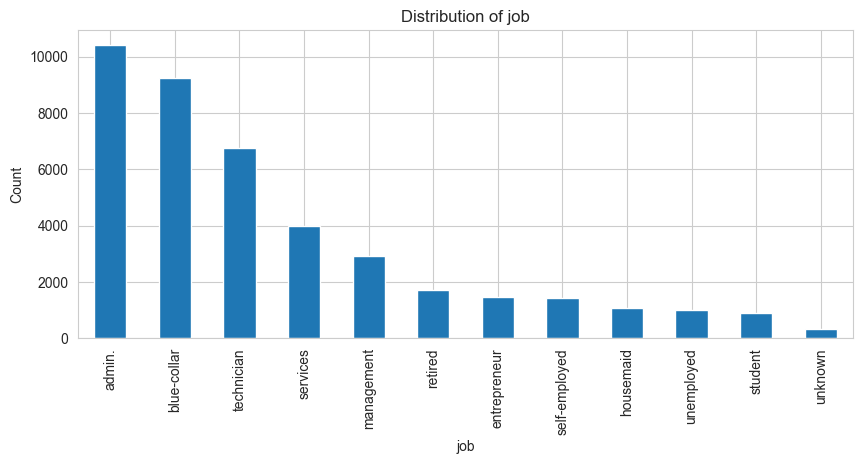

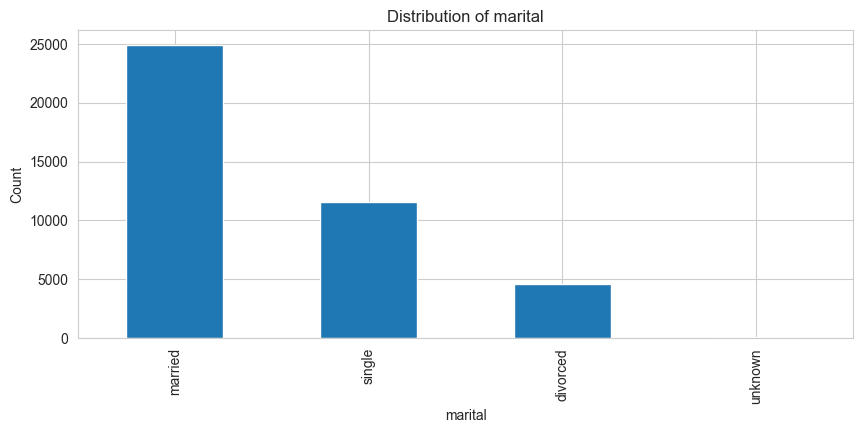

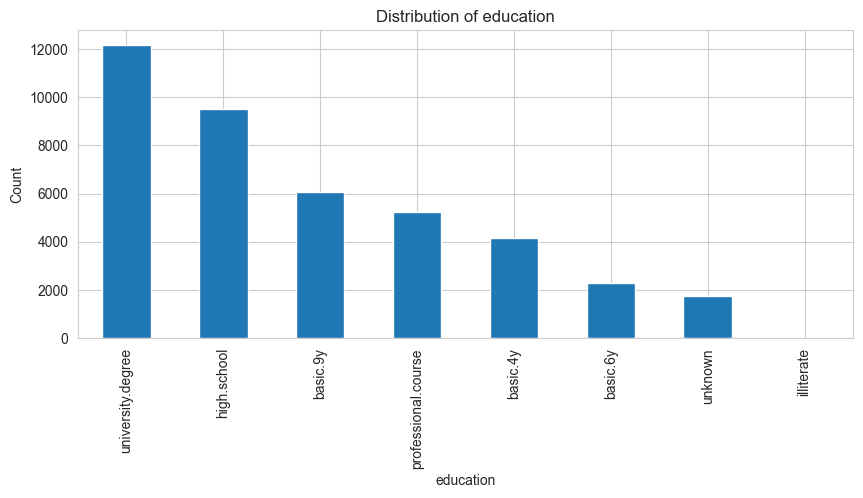

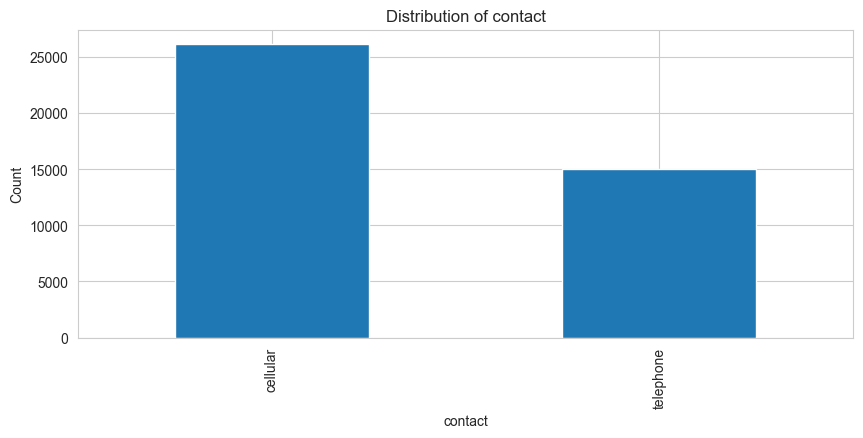

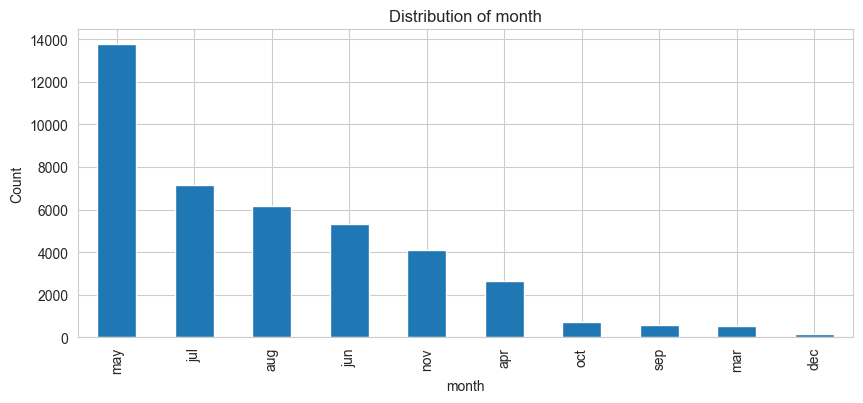

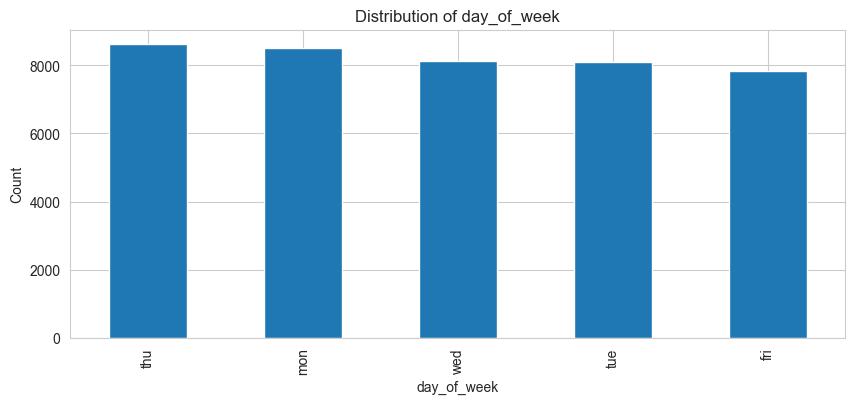

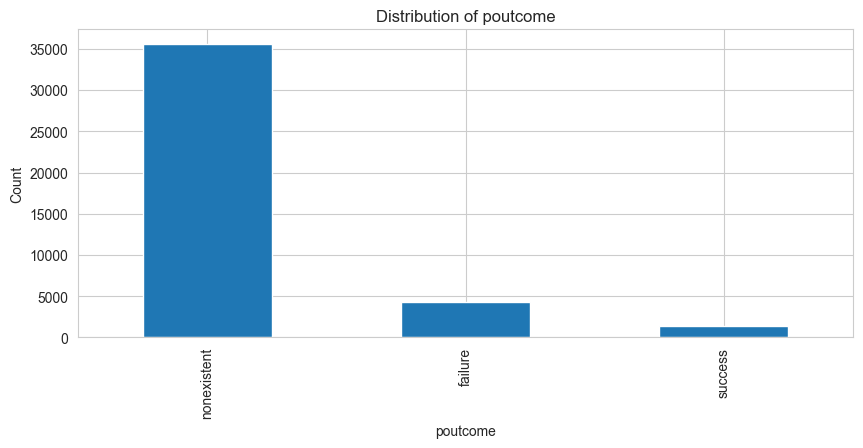

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,0.0,0.0,0.0,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,0.0
mean,40.02406,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN
max,98.00000,NaN,NaN,NaN,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,NaN


In [ ]:
# Conteggio dei valori per le variabili categoriche e visualizzazione con bar plot
cat_columns = data.select_dtypes(include=['category']).columns
for col in cat_columns:
    plt.figure(figsize=(10, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()

data.describe()


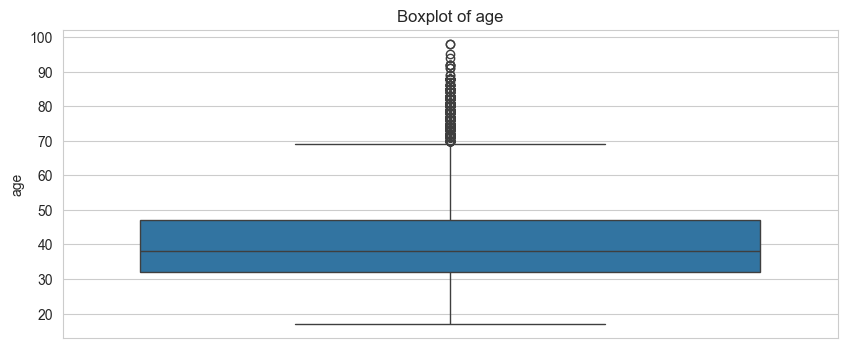

ValueError: List of boxplot statistics and `positions` values must have same the length

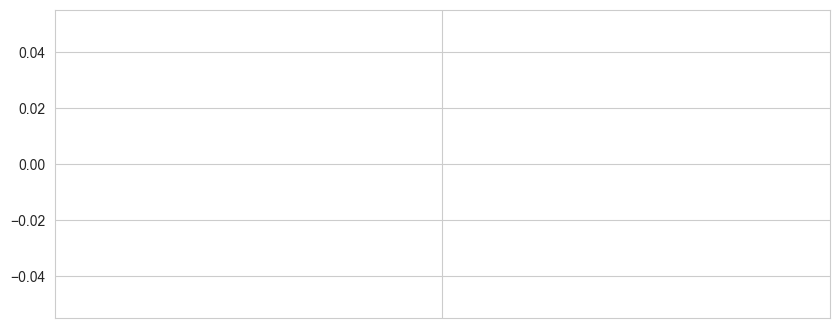

In [ ]:
# Boxplot per visualizzare la distribuzione e gli outlier delle variabili numeriche
for col in num_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()